# <font color='black'>Introduction aux systeÃÄmes radar</font>

---

<img src="images/logo.png" width="100" align="right">


> Year: **2022**
>
> Version: **1.0**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## <font color='black'>Introduction</font>

---

Un RADAR (RAdio Detection And Ranging) est un systeÃÄme de deÃÅtection eÃÅlectromagneÃÅtique (EM) et de mesure de distance. Son principe est analogue aux systeÃÄmes d'eÃÅcholocation qu'utilisent certains animaux eÃÅvoluant en milieu obscurs (chauve-souris, ceÃÅtaceÃÅs). La diffeÃÅrence principale est que l'on utilise une onde EM et non sonore.

Le radar eÃÅmet donc une impulsion EM de forte puissance. Celle-ci se propage jusqu'aÃÄ rencontrer un eÃÅventuel obstacle. Il reÃÅfleÃÅchit l'onde dont une partie est recueillie sur l'antenne du radar. La mesure du temps de vol entre l'onde eÃÅmise et l'onde recÃßue permet d'estimer la distance de la cible.

<img src="images/rad_fig1.png" width="500">


Ce systeÃÄme est donc actif, ce qui lui procure des avantages par rapport aux systeÃÄmes de deÃÅtection et de mesures passifs (optiques, par exemple) neÃÅcessitant une source exteÃÅrieure au systeÃÄme (soleil, par exemple). De plus, en fonction de la bande du spectre EM choisie pour eÃÅmettre, le systeÃÄme sera capable de ¬´voir¬ª aÃÄ travers certains milieux opaques aÃÄ la lumieÃÄre visible (nuages, brouillard) et meÃÇme peÃÅneÃÅtrer la matieÃÄre sur une certaine profondeur (deÃÅtection de mines enfouies, ...). Enfin, comme on maitrise l‚Äôonde eÃÅmise, on a directement acceÃÄs aÃÄ des mesures preÃÅcises de distances, contrairement aux systeÃÄmes passifs.


Le champ d‚Äôapplication de tels systeÃÄmes est donc treÃÄs vaste. Historiquement, les applications sont militaires (veille contre les attaques aeÃÅriennes, deÃÅtections de navires, autodirecteurs de missiles, cartographie de terrains, ...). Dans le monde civil, on peut citer la navigation aeÃÅrienne et maritime, la meÃÅteÃÅorologie, l‚ÄôaltimeÃÅtrie, les systeÃÄmes de freinage d‚Äôurgence pour veÃÅhicules automobiles, ...).

## Emission d‚Äôune impulsion unique, cible fixe

Nous allons tout d‚Äôabord nous placer dans le cas le plus simple d‚Äôobjets aÃÄ deÃÅtecter immobiles.

### ModeÃÅlisation des signaux eÃÅmis et recÃßus


Dans un premier temps, le signal eÃÅmis, $e(t)$, sera une simple impulsion de dureÃÅe $T = 1$ ms, moduleÃÅe par une freÃÅquence porteuse constante $f_0 = 40$ KHz, comme repreÃÅsenteÃÅ sur la figure ci-dessous:

<img src="images/rad_fig2.png" width="500">


Le signal recÃßu sur l‚Äôun des reÃÅcepteurs, $r(t)$, sera une reÃÅplique de $e(t)$ atteÃÅnueÃÅe et deÃÅcaleÃÅe dans le temps d‚Äôune valeur $\tau_0$.

#### Question 1

Donner l‚Äôexpression de $\tau_0$ en fonction de la distance $d$ entre la cible et le radar et $c$ la ceÃÅleÃÅriteÃÅ des ondes.

---


D'apr√®s les d√©finitions de l'√©nonc√©, on a :
 $$\tau_0 = d / c$$
 , le temps mis par l'onde pour parvenir √† l'obstacle.
 

Les signaux reÃÅels, eÃÅmis et recÃßus sont tout d‚Äôabord convertis en leurs signaux analytiques correspondants.

>##### Signal analytique, transformeÃÅe de Hilbert 
>La transformeÃÅe de Fourier $X(f)$ d‚Äôun signal reÃÅel $x(t)$ est aÃÄ symeÃÅtrie hermitienne (module pair et phase impaire). L'observation de la transformeÃÅe de Fourier seulement sur les freÃÅquences positives suffit donc aÃÄ reconstruire le signal sans perte d'information. 
>
>On peut ainsi deÃÅfinir le signal analytique associeÃÅ par 
>
> $$X_a(f) = 2 U(f) X(f)$$
>
>ouÃÄ $U(f)$ est l‚ÄôeÃÅchelon uniteÃÅ. Celui-ci est un signal complexe $x_a(t) = x(t) + i \hat x(t)$ dont la partie reÃÅelle est le signal d‚Äôorigine $x(t)$. Dans le cas des signaux aÃÄ bande eÃÅtroite (dont l‚Äôexcursion freÃÅquentielle est faible autour d‚Äôune freÃÅquence centrale), la partie imaginaire, appeleÃÅe TransformeÃÅe de Hilbert correspond aÃÄ la composante en quadrature par rapport aÃÄ $x(t)$ (deÃÅphaseÃÅe de $\pi/2$)



#### Question 2

VeÃÅrifier que $\Re[x_a(t)] = x(t)$ en calculant $\mathcal F [\Re[x_a(t)]]$.
De meÃÇme, donner la fonction de transfert freÃÅquentielle correspondant aÃÄ la transformeÃÅe de Hilbert en calculant $\mathcal F [\Im[x_a(t)]]$ . En deÃÅduire que la transformeÃÅe de Hilbert correspond aÃÄ un filtre deÃÅphaseur pur de $\cfrac{\pi}{2}$.
Calculer la transformeÃÅe de Fourier du signal eÃÅmis, $e(t)$. En deÃÅduire l‚Äôexpression du signal analytique associeÃÅ, $e_a(t)$.

---

Nous allons tout d'abord montrer un r√©sultat int√©rm√©diaire, √† savoir que :
Les parties r√©elle et imaginaire de la transform√©e de Fourier d'un signal sont respectivement les transform√©es de Fourier des parties paires et impaires du signal.
Preuve:
Soit $x(t)$ un signal. Soit $x_p$ sa partie paire et $x_i$ sa partie impaire.
On va montrer que $\mathcal F (x_p)$ est une fonction r√©elle.
$$\mathcal F (x_p) = \int_{-\infty}^{+\infty} x_p(t) e^{iwt} dt $$
$$= \int_{-\infty}^{0} x_p(t) e^{iwt} dt + \int_{0}^{+\infty} x_p(t) e^{iwt} dt$$ 
par relation de Chasles
$$= \int_{0}^{+\infty} x_p(-t) e^{-iwt} dt + \int_{0}^{+\infty} x_p(t) e^{iwt} dt$$ 
par changement de variable
$$ = \int_{0}^{+\infty} x_p(t) e^{-iwt} dt + \int_{0}^{+\infty} x_p(t) e^{iwt} dt$$ 
par parit√© de $x_p$
$$ = \int_{0}^{+\infty} x_p(t) (e^{-iwt}  + e^{iwt}) dt$$ 
par lin√©arit√© 
$$ = \int_{0}^{+\infty} 2 x_p(t) e^{-iwt} cos(wt)  dt$$ 
par propri√©t√© des exponentielles complexes
Ce r√©sultat est donc une fonction r√©elle, car l'int√©grale d'une fonction r√©elle est un r√©el.
On montre de m√™me que  $\mathcal F (x_i)$ est une fonction imaginaire pure. 
Comme tout signal peut se d√©composer en la somme de sa partie paire et impaire.
On a : Par lin√©arit√© de la transform√©e de Fourier.
$\mathcal F (x)$ = $\mathcal F (x_p)$ + $\mathcal F (x_i)$
et donc d'apr√®s ce qui pr√©c√®de:
$\Re (\mathcal F (x)) = \mathcal F (x_p)$ et $\Im (\mathcal F (x)) = \mathcal F (x_i)$ 

Ce r√©sultat prouv√©, nous allons montrer que $\Re[x_a(t)] = x(t)$
On a d'apr√®s l'√©nonc√©:
$$X_a(f) = 2 U(f) X(f) = \mathcal F (x_a)$$
Par lin√©arit√© de la transform√©e de Fourier:
$$ = \mathcal F (\Re (x_a))  + i \mathcal F (\Im (x_a))$$






Nous allons tout d'abord montrer un r√©sultat interm√©diaire,  √† savoir que :
Si un signal $x(t)$ est r√©el, alors la partie r√©elle de sa TF est la partie paire de sa TF et la partie imaginaire de sa TF est sa partie impaire.
Preuve:
Soit $x(t)$ un signal r√©el:
$$ \mathcal F (x)(w) =  \int_{-\infty}^{+\infty} x(t) e^{iwt} dt $$
Comme x est r√©el
$$ = c$$
Comme le produit des conjugu√©s est √©gal au conjugu√© des produits
$$ = \int_{-\infty}^{+\infty} (x_p(t) e^{-iwt})* dt$$
Comme le conjugu√© de l'int√©grale est l'int√©grale des conjugu√©s
$$ = \int_{-\infty}^{+\infty} (x_p(t) e^{-iwt}) dt *$$
$$ = \mathcal F (x)*(-w)$$
Donc, en passant aux parties r√©elles et imaginaires:
$$\Re \mathcal F(x)(w) = \Re \mathcal F (x)(-w)$$
et $$\Im \mathcal F(x)(w) =- \Im \mathcal F (x)(-w)$$
La partie r√©elle de la TF de x est donc paire, et la partie imaginaire est impaire.
Ainsi, comme il existe une unique paire de fonction X_p, X_i respectivement paire et impaire telle que 
$\mathcal F(x) = X_p + X_i$, et que par propri√©t√© de la partie r√©elle et imaginaire, on a:
$\mathcal F(x) = \Re \mathcal F(x) + i \Im \mathcal F(x)$, on a par identification, 
$$\Re \mathcal F(x) = X_p$$
$$ \Im \mathcal F(x) = X_i$$

Montrons maintenant le r√©sultat demand√©.
D'apr√®s l'√©nonc√©, $$X_a(f) = 2 U(f) X(f) = \mathcal F (x_a)$$
La partie paire de $$X_a(f)$$ est donc $X(f)$, par d√©finition de la fonction √©chelon unit√©. Nous la noterons $X_{a,p}$, et $X_a,i$ pour la partie impaire.

Comme le signal $\Re (x_a)$ est r√©el, on a.
$\mathcal F(\Re x_a) = 



### R√©ponse √† la question 2
Tout d'abord, nous allons montrer le r√©sultat suivant, pour tout signal $x(t)$
$$ \mathcal F(\Re (x)) = \frac {\mathcal F(x) + \mathcal F(-x)*}{2}$$
$$ \mathcal F(\Im (x)) = \frac {\mathcal F(x) - \mathcal F(-x)*}{2}$$
Ainsi, en apppliquant ce r√©sultat √† $x_a$, on a:
$$ \mathcal F(\Re (x_a)) = \frac {\mathcal F(x_a) + \mathcal F(-x_a)*}{2}$$
Or, d'apr√®s l'√©nonc√©, $$X_a(f) = 2 U(f) X(f) = \mathcal F (x_a)$$
De plus, comme $x(t)$ est r√©el, on a la relation suivante, d√©montr√©e plus haut: $$X(f) = X(-f)*$$
Donc, $$\frac {\mathcal F(x_a) + \mathcal F(-x_a)*}{2} = X$$
Ainsi, par bijectivit√© de la tranform√©e de Fourier, on a bien:
$$\Re(x_a)(t) = x(t)$$
On en d√©duit, comme $x_a(t) = x(t) + i \hat x(t)$, que $ \Im (x_a)(t) = \hat x(t)$
Ainsi, en utilisant la deuxi√®me √©galit√© plus haut:
$$ \mathcal F(\Im (x_a)) = \frac {\mathcal F(x_a) - \mathcal F(-x_a)*}{2}$$
De m√™me que pr√©c√©demment, comme $X(f) = X(-f)*$ et  $X_a(f) = 2 U(f) X(f)$, on a :
$$ \mathcal F(\Im (x_a))(f) = sgn(f)X(f)$$
Ainsi, $$ \mathcal F(\hat x)(f) = sgn(f)X(f)$$
Donc, on peut voir la transform√©e de Hilbert comme un filtre dont la fonction de transfert serait telle que:
$$\forall w, H_H(jw)* jw = w sgn(w)$$
Et donc:
$$H_H(jw) = -jsgn(w)$$

En appliquant ce filtre √† un cosinus, on a, avec $w>0$ sans perdre de g√©n√©ralit√©:
$$ \hat {\frac{e^{jwt} + e^{-jwt}}{2}} = \mathcal F^{-1}((H_H)(jwt) + (H_H)(-jwt))$$
$$ = ...$$
$$=\frac{e^{jwt} + e^{-jwt}}{2}$$
On transforme donc un cosinus en un sinus. Ce filtre est donc bien un quadrateur!






### Calcul de la transform√©e de Fourier de x(t):
D'apr√®s l'√©nonc√©:
$$e(t) = 1_{[-\frac {T_0}{2}, \frac {T_0}{2}]}sin(2\pi f_0 t)$$
Donc $$F(e(t))(w) = \int_{-\infty}^{+\infty} 1_{[-\frac {T_0}{2}, \frac {T_0}{2}]}sin(2\pi f_0 t) e^{-iwt} dt$$
$$= \int_{-\frac {T_0}{2}}^{\frac {T_0}{2}} sin(2\pi f_0 t) e^{-iwt} dt$$
Avec $w_0 = 2\pi f_0$:
$$=  \int_{-\frac {T_0}{2}}^{\frac {T_0}{2}} sin(w_0 t) cos(wt) - i sin(w_0 t) sin(wt)  dt$$
D'apr√®s les formules de Simpson:
$$= \int_{-\frac {T_0}{2}}^{\frac {T_0}{2}} \frac {sin((w_0+w)t) + sin((w_0 - w)t)}{2} + i \int_{-\frac {T_0}{2}}^{\frac {T_0}{2}} \frac {cos((w_0+w)t) - cos((w_0 - w)t)}{2}$$
$$ = \frac {1}{2} [\frac {-cos((w_0+w)t)}{w_0 + w}]_{-\frac {T_0}{2}}^{\frac {T_0}{2}} +  [\frac {-cos((w_0-w)t)}{w_0- w}]_{-\frac {T_0}{2}}^{\frac {T_0}{2}}+ i([\frac {sin((w_0+w)t)}{w_0 + w}]_{-\frac {T_0}{2}}^{\frac {T_0}{2}} +  [\frac {sin((w_-+w)t)}{w_0 - w}]_{-\frac {T_0}{2}}^{\frac {T_0}{2}})$$
Par parit√© de cos et imparit√© de sin:
$$ =i \frac {sin(\frac {(w_0 +w)T_0}{2})}{w_0 + w} + \frac {sin( \frac {(w_0 - w)T_0}{2})}{w_0 - w}$$
Nous allons √† pr√©sent tracer le module cette foncton:

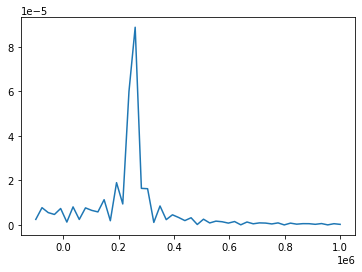

In [2]:
#trac√© de la fonction avec les valeurs de l'√©nonc√©
w0 = 2*np.pi*40000
tab_w = np.linspace(-100000,1000000)
tab_f =abs( np.sin((tab_w + w0)*0.0005)/(w0 + tab_w) +  np.sin((tab_w - w0)*0.0005)/(w0 - tab_w))
plt.plot(tab_w, tab_f)


On observe donc bien une fonction dont l'excursion est faible autour de la fr√©quence centrale $w_0$!
On va donc pouvoir utiliser le fait que la transform√©e de Hilbert s'approxime par un simple d√©phasage de $\frac {\pi}{2}$
D'o√π: $$ \hat x(t) =  1_{[-\frac {T_0}{2}, \frac {T_0}{2}]}cos(2\pi f_0 t)$$

Ainsi, le signal analytique s'√©crit:
$$x_a(t) =  1_{[-\frac {T_0}{2}, \frac {T_0}{2}]}sin(2\pi f_0 t) + i 1_{[-\frac {T_0}{2}, \frac {T_0}{2}]}cos(2\pi f_0 t) $$



# Autre mani√®re de calculer l'int√©grale donne : 

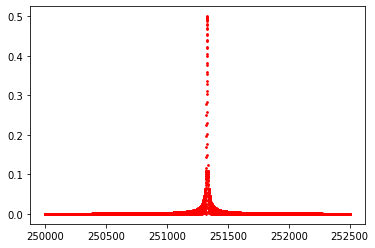

In [3]:
#trac√© de la fonction avec les valeurs de l'√©nonc√©
w0 = 2*np.pi*40000
tab_w = np.linspace(250000,252500,10000)
tab_f =abs(-(1/2)*(np.sin((w0 - tab_w)/2)/((w0 - tab_w)/2) -  np.sin((w0 + tab_w)/2)/((w0 + tab_w)/2)))
plt.scatter(tab_w, tab_f, s = 3, c='r')
plt.show()

L‚ÄôinteÃÅreÃÇt de convertir les signaux reÃÅels en leurs eÃÅquivalents complexes reÃÅside dans le fait que tout deÃÅphasage sera vu comme une simple multiplication par un nombre complexe. Il est ainsi plus facile d‚Äôextraire et de traiter la phase de 
$x_a(t) = \alpha e^{i \varphi} e^{2 i \pi f_0 t}$ que de $x(t) = \alpha \cos (2 i \pi f_0 t + \varphi)$

### NumeÃÅrisation des signaux

Ces signaux complexes sont ensuite eÃÅchantillonneÃÅs aÃÄ une freÃÅquence $f_s = 9.5$ KHz (environ), ne respectant pas le theÃÅoreÃÄme de Shannon. Cela permet de deÃÅmoduler (diminution de la freÃÅquence porteuse) les signaux et de reÃÅduire la taille des vecteurs aÃÄ traiter. 

> #####  TheÃÅoreÃÄme de Shannon ‚Äì Repliement de spectre (aliasing)
>
>Le fait d‚ÄôeÃÅchantillonner un signal continu aÃÄ une cadence $f_s$ entraine une peÃÅriodisation de sa transformeÃÅe de Fourier aÃÄ la peÃÅriode $f_s$ Ainsi, si l‚Äôon veut retrouver, sans ambiguiÃàteÃÅ le signal continu d‚Äôorigine, il faut eÃÅchantillonner aÃÄ une cadence strictement supeÃÅrieure aÃÄ 2 fois la freÃÅquence maximale contenue dans le signal d‚Äôorigine.
>
>Si cette condition de Shannon n‚Äôest pas respecteÃÅe, une partie de l‚Äôinformation sera perdue et le signal sera modifieÃÅ. Dans le cas d‚Äôun signal aÃÄ bande eÃÅtroite, si l‚Äôon choisit une freÃÅquence d‚ÄôeÃÅchantillonnage supeÃÅrieure aÃÄ la bande mais infeÃÅrieure aÃÄ la freÃÅquence porteuse, le repliement de spectre engendreÃÅ modifie seulement la freÃÅquence porteuse apparente et est assimilable aÃÄ une deÃÅmodulation.

#### Question 3
Quelle sera la freÃÅquence apparente des signaux eÃÅchantillonneÃÅs ?

---

### Question 3:
Fr√©quence des signaux √©chantillon√©s:
D'apr√®s la formule de poisson, avec $w_e$ la pulsation d'√©chantillonage:
$$\Delta t \hat x_d(t)(w) = \sum_n \mathcal F(x)(w - nw_e)$$ 
Cela prouve la p√©riodicit√© en $w_e$ du spectre su signal √©chantillon√©.
Or, on a vu que le maximum de $\mathcal F(x)$ est atteint en $w = w_0$, et que le signal est assimilable √† une seule bande non nulle √† cette fr√©quence.
Ainsi, $\Delta t \hat x_d(t)(w)$ sera "nul" partour sauf pour les w tels que :
$$w = w_0 + nw_e$$ 
La fr√©quence apparente du signal sera donc la plus faible de cette fr√©quence (v√©rifiant tout de m√™me w>=0 car on s'est plac√© sur \R+), c'est √† dire, comme $w_ > w_e$: $$w_{app} = w_0 - w_e$$



### Estimation de la distance


Nous avons vu dans la partie preÃÅceÃÅdente, que le but premier d‚Äôun radar eÃÅtait de deÃÅtecter et d‚Äôestimer la distance des objets environnants. Pour cela, la meÃÅthode optimale est d‚Äôeffectuer l‚ÄôintercorreÃÅlation entre le signal recÃßu et le signal eÃÅmis.

> ##### AutocorreÃÅlation - IntercorreÃÅlation
>
> On sait que l‚ÄôeÃÅnergie se conserve par transformeÃÅe de Fourier (theÃÅoreÃÄme de Parseval) :
>
> $$ \int_{-\infty}^{+\infty} |x(t)|^2 dt = \int_{-\infty}^{+\infty} |X(f)|^2 df $$
>
> On peut ainsi deÃÅfinir une densiteÃÅ spectrale d‚ÄôeÃÅnergie :  $\Phi_x (f) = |X(f)|^2$.
>
>
> Par transformeÃÅe de Fourier inverse, on a :
> $$ \mathcal F^{-1} [|X(f)|^2] = x(t) * x^*(-t) = \int_{-\infty}^{+\infty}  x(t)\, x^*(t-\tau) dt $$
>
>C‚Äôest la fonction d‚ÄôautocorreÃÅlation, noteÃÅe :
> $$ R_x(\tau) = \int_{-\infty}^{+\infty}  x(t)\, x^*(t-\tau) dt $$
>
> Elle mesure la ressemblance d‚Äôun signal $x(t)$ avec sa reÃÅplique deÃÅcaleÃÅe en temps. Cette fonction est aÃÄ symeÃÅtrie hermitienne et maximale en 0. 
>
> On peut geÃÅneÃÅraliser cette fonction aÃÄ l‚ÄôintercorreÃÅlation entre 2 signaux :
> $$ R_{xy}(\tau) = \int_{-\infty}^{+\infty}  x(t)\, y^*(t-\tau) dt = x(t) * y^*(-t) = \mathcal F^{-1} [X(f)Y^*(f)] $$
>
>Pour les signaux discreÃÅtiseÃÅs en temps, on utilise la formulation suivante :
> $$ R_{xy}[k] = \sum_{n = -\infty}^{+\infty} x[n] y^*[n-k] $$

> ##### Algorithme de FFT
> L‚Äôalgorithme dit de Fast Fourier Transform (FFT) duÃÇ aÃÄ Cooley et Tukey (1965) consiste aÃÄ scinder la transformeÃÅe de Fourier du vecteur initial de taille N en transformeÃÅes de Fourier de taille N/2. On peut ainsi se ramener successivement aÃÄ des transformeÃÅes de Fourier eÃÅleÃÅmentaires de taille 2 permettant de passer d‚Äôune charge calculatoire en $O(N^2)$ avec l‚Äôalgorithme ¬´ naiÃàf ¬ª (produit matriciel) aÃÄ une charge calculatoire en $O(Nlog_2(N))$.

#### Question 4
En supposant que $r_a(t) = \alpha e_a(t - \tau_0)$ ouÃÄ $\alpha$ est un nombre complexe inconnu, exprimer l‚ÄôintercorreÃÅlation $R_{r_a e_a}(\tau)$ en fonction de l‚ÄôautocorreÃÅlation de $e_a(t)$. Calculer et tracer la fonction d‚ÄôautocorreÃÅlation de $e_a(t)$ .

---

#### R√©ponse 4  

On a : 
$$
\begin{align}
R_{e_ar_a}(\tau) & =  \int_{-\infty}^{+\infty} \alpha e_a(t-\tau_0)e_a^*(t-\tau)dt \\
\newline
R_{e_ar_a}(\tau) & = \alpha \int_{-\infty}^{+\infty} e_a(t) e_a^*(t - (\tau - \tau_0))dt \\
\newline
R_{e_ar_a}(\tau) & = \alpha R_{e_a}(\tau - \tau_0) 
\end{align} 
$$

Or, dans le cas g√©n√©rale, on a : 
$$
\begin{align}
R_{xy}(\tau) & =  \int_{-\infty}^{+\infty} x(t)y^*(t-\tau)dt \\
\newline 
&= \int_{-\infty}^{+\infty} x(t+\tau)y^*(t)dt \\
\newline
R_{xy}(-\tau)^* & =  \int_{-\infty}^{+\infty} y(t)x^*(t-\tau)dt = R_{yx}(\tau)
\end{align}
$$

Soit en l'appliquant √† l'√©galit√© pr√©c√©dente :

$$
\begin{align}
R_{r_ae_a}(\tau) &= R_{e_ar_a}(-\tau)^* \\
\newline
R_{r_ae_a}(\tau)&= \alpha^*R_{e_a}^*(-\tau - \tau_0)
\end{align}
$$


$$x_a(t) =  1_{[-\frac {1}{2}, \frac {1}{2}]}sin(2\pi f_0 t) + i 1_{[-\frac {1}{2}, \frac {1}{2}]}cos(2\pi f_0 t) $$

#### On trace alors la fonction d'autocorr√©lation de e_a(t)

#### M√©thode 1 : On trace la fonction d'autocorr√©lation na√Øvement : en calculant l'int√©grale

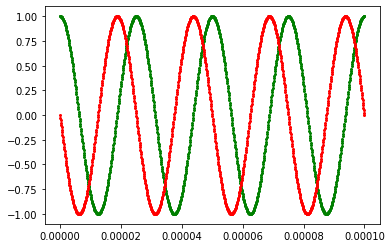

In [4]:
f0 = 40000
import cmath
import scipy.integrate as integr

def e_a(t):
    if t < -0.5 or t > 0.5: 
        return 0 
    else : 
        return complex(np.sin(2*np.pi*f0*t), np.cos(2*np.pi*f0*t))

def I_ea(tau):
    def f_real(t):
        a = complex(np.sin(2*np.pi*f0*t), np.cos(2*np.pi*f0*t))
        b = complex(np.sin(2*np.pi*f0*(t-tau)), np.cos(2*np.pi*f0*(t-tau))).conjugate()
        return (a*b).real
    def f_imag(t):
        a = complex(np.sin(2*np.pi*f0*t), np.cos(2*np.pi*f0*t))
        b = complex(np.sin(2*np.pi*f0*(t-tau)), np.cos(2*np.pi*f0*(t-tau))).conjugate()
        return (a*b).imag
    return complex(integr.quad(f_real, -0.5, 0.5)[0],integr.quad(f_imag, -0.5, 0.5)[0])


Tau = np.linspace(0, 0.0001, 1000)
Y = np.array([I_ea(tau) for tau in Tau])
plt.scatter(Tau, Y.real, color = 'green', s = 4)
plt.scatter(Tau, Y.imag, color = 'red', s = 4)

plt.show()

#### M√©thode 2 : On trace la fonction d'autocorr√©lation avec la formule suivante, m√©thode FFT

$$
\mathcal F^{-1} [|X(f)|^2](\tau) = R_x(\tau)
$$

In [5]:
def x(t): 
    if t <= -0.5 or t >= 0.5: 
        return 0 
    else : 
        return np.sin(2*np.pi*f0*t)

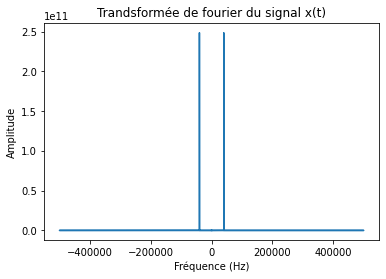

In [6]:
from scipy.signal import find_peaks

X = np.linspace(-0.5, 0.5, 1000000)
Y = [x(t) for t in X]

FFT = abs(np.fft.fft(Y))**2
freq = np.fft.fftfreq(len(X), d=1/1000000)
plt.plot(freq, FFT)
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('Trandsform√©e de fourier du signal x(t)')
plt.show()

On observe bien comme pr√©vu deux pics vers 40kHz et -40kHz. Ces pics sont des sinus cardinaux (influence de la fonction porte).

/Users/nicolasplantier/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


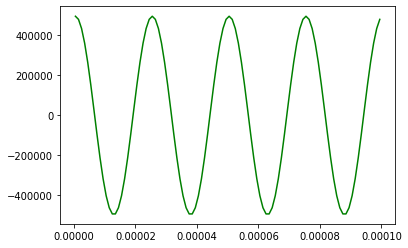

In [7]:
correlation = np.fft.ifft(FFT)
temps = X 
cor_tau = []
cor_valeur = []
i = 0
for t in temps: 
    if t >= 0 and t<=0.0001 : 
        cor_tau.append(t)
        cor_valeur.append(correlation[i])
    i+=1
plt.plot(np.array(cor_tau), np.array(cor_valeur), color = 'green')

On retrouve bien le m√™me graphique que dans le calcul explicite de l'int√©grale que nous avons effectu√© pr√©c√©demment. 

On va donc d√©finir la fonction qui calcule la fonction d'autocorr√©lation d'un signal analytique par FFT et celle qui calcule l'intercorr√©lation entre deux signaux : 

In [32]:
def autocorrelation(temps, valeurs): 
    """
    temps c'est la plage de temps sur laquelle on a des valeurs 
    valeurs c'est les valeurs que prends la fonction dont on veut calculer la fonction d'autocorr√©lation 

    Cette fonction renvoie donc une fonction sous la forme (temps, valeurs de la fonction d'autocorr√©lation)
    """
    FFT = abs(np.fft.fft(valeurs))**2
    return(temps, np.fft.ifft(FFT))

def intercorr√©lation(temps, x_valeurs, y_valeurs): 
    if type(x_valeurs[0]) != float: #cette √©tape est n√©cessaire pour convertir un ndarray dont les √©l√©ments sont des ndarray vers un ndarray dont les √©l√©ments sont des flottants. 
        a = []
        b = []
        for k in range(len(x_valeurs)):
            a.append(x_valeurs[k][0])
            b.append(y_valeurs[k][0])
        x_valeurs = np.array(a)
        y_valeurs = np.array(b)
        x_FFT = np.fft.fft(x_valeurs)
        y_FFT = np.fft.fft(y_valeurs).conjugate()
        produit = x_FFT*y_FFT
    return (temps, np.fft.ifft(produit))

#### Code 1 - Une impulsion non modul√®e en fr√©quence 

Le fichier ¬´ signal1.mat ¬ª correspond aÃÄ un enregistrement des signaux analytiques eÃÅmis et recÃßus sur une sceÃÄne reÃÅelle.
* Observer l‚Äôallure temporelle de ces signaux et veÃÅrifier la valeur de la freÃÅquence observeÃÅe.
* Calculer et tracer la fonction d‚ÄôintercorreÃÅlation.
* Essayer d‚Äôidentifier le nombre de cibles preÃÅsentes ainsi que leur distance. Essayer de deÃÅfinir une reÃÅsolution du systeÃÄme (distance minimale aÃÄ partir de laquelle on peut voir 2 cibles). Relier cette reÃÅsolution aÃÄ la dureÃÅe de l‚Äôimpulsion eÃÅmise T.

## Observer l‚Äôallure temporelle de ces signaux et veÃÅrifier la valeur de la freÃÅquence observeÃÅe.

In [9]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

c = 340    # c√©l√©rit√© des ondes sonores 
f0 = 40E3  # fr√©quence porteuse
T = 1E-3   # dur√©e de l'impulsion

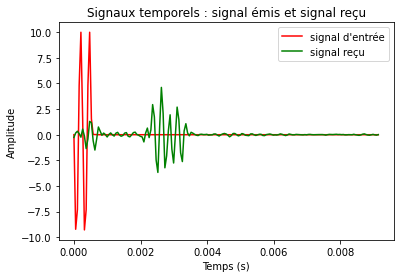

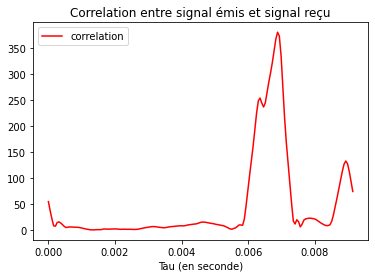

In [52]:
data = scipy.io.loadmat('data/signal1.mat') # chargement du fichier de donn√©es

e = data['e'] # e pour entr√©e 
r = data['r'] # r pour le retour 
Fs = data['Fs']
N = len(r)                                # nombre de points du signal
d = c * np.arange(0,N)/Fs/2               # axe distance (metres)
temps = d[0]/c

cor_fft = intercorr√©lation(temps, e,r)           # calcul de la corr√©lation par FFT
resol_theorique = None                    # r√©solution th√©orique

#trac√©s

#Trac√© des signaux (en temporel)
T = d[0]/c
plt.figure()
plt.plot(T, e.real, color = 'red', )
plt.plot(T, r.real, color = 'green')
plt.legend({"signal d'entr√©e", "signal re√ßu"})
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Signaux temporels : signal √©mis et signal re√ßu')
plt.show()

#Trac√© de la correlation 
plt.figure()
plt.plot(cor_fft[0], abs(cor_fft[1]), label = "correlation", color = 'red')
plt.legend()
plt.xlabel('Tau (en seconde)')
plt.title(None)
plt.title('Correlation entre signal √©mis et signal re√ßu')
plt.show()


## Calculer et tracer la fonction d‚ÄôintercorreÃÅlation.

Nous allons donc ici calculer : $R_{r,e}(k) = \sum_{n=0}^N r[n] e^*[n-k]$ 

Ainsi, l'instant $k$ correspondra au temps $T[k]$

In [98]:
def inter_correlation(k):
    S = 0 
    e_reel = e.real 
    e_imag = e.imag
    r_reel = r.real 
    r_imag = r.imag
    for n in range(N):
        if (n-k)>= 0: 
            S += (complex(r_reel[n],r_imag[n]))*(complex(e_reel[n-k],-e_imag[n-k]))
    return S

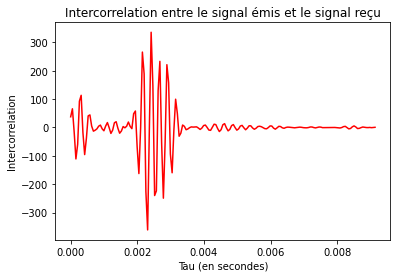

In [108]:
T = d[0]/c
Y = np.array([inter_correlation(k) for k in range(len(T))])
plt.plot(T, Y.real, color = 'red')
plt.xlabel('Tau (en secondes)')
plt.ylabel('Intercorrelation')
plt.title('Intercorrelation entre le signal √©mis et le signal re√ßu')
plt.show()

La cellule de code suivante permet de calculer les deux instants ($T_{max,1}$ et $T_{max,2}$) o√π l'intercorr√©lation est maximale. 


In [122]:
Tmax1 = 0 
max = 0 
i = 0
while T[i] <= 0.001: 
    if inter_correlation(i).real >= max:
        max = inter_correlation(i).real
        Tmax1 = T[i]
    i +=1

Tmax2 = 0 
max = 0 
j = 0
while T[j] <= 0.004: 
    if inter_correlation(j).real >= max:
        max = inter_correlation(j).real
        Tmax2 = T[j]
    j +=1

print('Tmax1 = ', round(Tmax1,6), 's')
print('Tmax2 = ', Tmax2, 's')

Tmax1 =  0.000315 s
Tmax2 =  0.002415 s


On remarque donc que la fonction d'intercorr√©lation poss√®de deux pics correspondant donc aux deux cibles en pr√©sence. Le signal de la premi√®re cible a donc mis le temps $T_{max,1}$ pour faire l'aller retour (d√©part au niveau du point d'emission, r√©flexion sur la cible, puis trajet retour). Ainsi, il a mis : 
$$D_{cible,1} = \frac{c \times T_{max,1}}{2} = 5,36 cm$$ 

De m√™me, pour la seconde cible, on a : 

$$D_{cible,2} = \frac{c \times T_{max,2}}{2} = 41,06 cm$$ 

Afin de pouvoir observer deux cibles diff√©rentes, il faut donc que les signaux re√ßus de la r√©flexion de la cible 1 et celui de la cible 2 soient disjoints. Si pour simplifier, on prend un signal √©mis en cr√©neau et que le signal re√ßu a aussi une forme de cr√©neau parfait (mais d'amplitude l√©g√®rement inf√©ieure). Si l'on place deux cibles et que les signaux de retour sont disjoints, on aura bien deux pics au niveau de la courbe d'intercorr√©lation (un creux s√©pare clairement les deux pics dans la fonction d'intercorr√©lation). Si au contraire, les deux signaux ne sont pas disjoints, nous verrons alors un unique pic (l√† o√π les deux cr√©neaux sont confondus) et nous ne pourrons donc plus distinguer les deux pics correspondants au r√©flexions sur deux cibles distinctes. 

On en vient donc √† la limite suivante : la fin de r√©ception d'un signal ne doit pas s'intersecter avec le d√©but de r√©ception d'un autre. 
Si l'on dit que on √©met un signal √† l'instant $t=0$ : 
- La fin du signal r√©fl√©chit sur la cible 1 arrivera √† $t= \frac{2*d_1}{c} + T$. 
- Le d√©but du signal r√©fl√©chit sur la cible 1 arrivera √† $t = \frac{2*d_2}{c}$

En √©galisant ces deux quantit√©s, on trouve donc le pouvoir de r√©solution : $\Delta d = d_2 - d_1 = \frac{cT}{2}$. On remarque bien que a priori, une p√©riode d'impulsion courte permettra une meilleure r√©solution du syst√®me.


$\\[3cm]$

Le pouvoir de reÃÅsolution du systeÃÄme en utilisant cette forme d‚Äôonde basique (impulsion moduleÃÅe par une freÃÅquence constante) ne permet pas de distinguer 2 objets proches. L‚ÄôameÃÅlioration de la reÃÅsolution du systeÃÄme passe par la reÃÅduction du temps d‚Äôimpulsion. Malheureusement, cette diminution va aÃÄ l‚Äôencontre de la porteÃÅe du systeÃÄme qui est proportionnelle aÃÄ l‚ÄôeÃÅnergie eÃÅmise. La solution classiquement employeÃÅe pour diminuer la reÃÅsolution sans sacrifier la porteÃÅe est d‚Äôaugmenter la bande du signal eÃÅmis. Nous allons donc maintenant utiliser une onde moduleÃÅe lineÃÅairement en freÃÅquence, comme repreÃÅsenteÃÅe sur la figure suivante. La freÃÅquence varie de 38 aÃÄ 42 KHz (soit une bande $ùêµ = 4$ KHz autours de $f_0$).

<img src="images/rad_fig3.png" width="500">

#### Question 5

Quelles vont eÃÇtre les freÃÅquences observeÃÅes apreÃÄs eÃÅchantillonnage aÃÄ $f_s = 9.5$ KHz ? Si l‚Äôon suppose que la transformeÃÅe de Fourier de $e_a(t)$ est proportionnelle aÃÄ un rectangle de largeur $ùêµ$ centreÃÅ sur $f_0$ ( $\Pi_B \left(f - f_0)\right)$ ), calculer la largeur de la fonction d‚ÄôautocorreÃÅlation du signal eÃÅmis. En deÃÅduire la reÃÅsolution theÃÅorique du systeÃÄme.

---


#### Code 2 - Une impulsion modul√©e en fr√©quence

Le fichier ¬´ signal2.mat ¬ª correspond √† un enregistrement de ces signaux modul√©s en fr√©quence sur la m√™me sc√®ne que pr√©c√©demment.
*   Calculer et tracer la fonction d‚Äôintercorr√©lation.
*   Essayer d‚Äôidentifier le nombre de cibles ainsi que leur distance. Comparer √† la r√©solution th√©orique calcul√©e au-dessus.


In [129]:
from scipy.signal import find_peaks
B = 4E3 #bande de fr√©quence

data = scipy.io.loadmat('data/signal2.mat')
e = data['e']
r = data['r']
Fs = data['Fs']
N = len(r)                                # nombre de points du signal
d = c * np.arange(0,N)/Fs/2               # axe distance (metres)

cor_fft = None                            # calcul de la corr√©lation par FFT
peaks = find_peaks(None)                  # identification des pics de la fonction d'intercorr√©lation
resol_theorique = None

#trac√©s
plt.figure(), plt.plot(None)
plt.legend()
plt.xlabel(None)
plt.ylabel(None)
plt.title(None)

ValueError: `x` must be a 1-D array

#### On trace d'abord les signaux √©mis et re√ßus (rouge = √©mis, bleu = re√ßu)

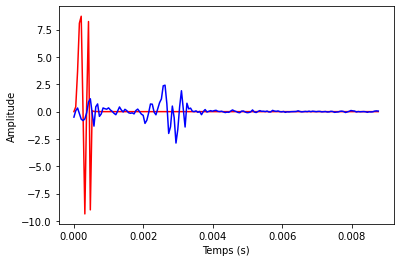

In [131]:
T = d[0]/c
plt.plot(T, e.real, color = 'red', )
plt.plot(T, r.real, color = 'blue', )
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.show()

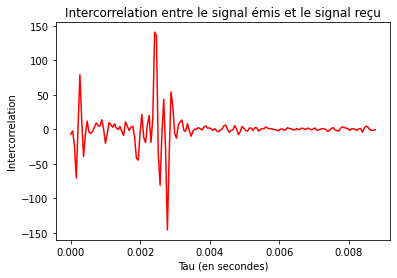

In [127]:
T = d[0]/c
Y = np.array([inter_correlation(k) for k in range(len(T))])
plt.plot(T, Y.real, color = 'red')
plt.xlabel('Tau (en secondes)')
plt.ylabel('Intercorrelation')
plt.title('Intercorrelation entre le signal √©mis et le signal re√ßu')
plt.show()

In [132]:
Tmax1 = 0 
max = 0 
i = 0
while T[i] <= 0.001: 
    if inter_correlation(i).real >= max:
        max = inter_correlation(i).real
        Tmax1 = T[i]
    i +=1

Tmax2 = 0 
max = 0 
j = 0
while T[j] <= 0.004: 
    if inter_correlation(j).real >= max:
        max = inter_correlation(j).real
        Tmax2 = T[j]
    j +=1

print('Tmax1 = ', round(Tmax1,6), 's')
print('Tmax2 = ', Tmax2, 's')

Tmax1 =  0.000263 s
Tmax2 =  0.002415 s


## Emission d‚Äôun train d‚Äôimpulsions, cible mobile

### ModeÃÅlisation des signaux eÃÅmis et recÃßus

Nous allons maintenant consideÃÅrer que les cibles viseÃÅes peuvent eÃÇtre mobiles. Nous supposerons le vecteur vitesse constant durant le temps de mesure (quelques dixieÃÄmes de secondes).

#### Question 6

Montrer que le retard de propagation peut maintenant s‚Äôexprimer comme suit $\tau (t) \approx \cfrac{2 d_0}{c} + \cfrac{2 V_r}{c} t $ en fonction de la position initiale $d_0$ de la cible et de sa vitesse radiale $V_r$. Si l‚Äôon note $e_a(t) = \beta(t) e^{2 i \pi f_0 t }$, donner l‚Äôexpression du signal recÃßu. Montrer que celui-ci peut se
mettre sous la forme suivante : $r_a(t) = \alpha e_a(t - \tau_0) e^{- 2 i \pi f_d t}$ si l‚Äôon neÃÅglige l‚Äôeffet de la vitesse sur le terme $\beta(t)$. Donner l‚Äôexpression de la freÃÅquence Doppler : $f_d$.

---

#### R√©ponse 6 

Pour le retard de propagation, il faut remarquer que la distance √† parcourir pour l'onde sera celle qu'elle avait √† partcourir √† l'instant $t=0$ ($\frac{2d_0}{c}$) quand l'objet √©tait √† la distance $d_0$ plus celle du au fait que l'objet s'est √©loign√© de la distance $V_r\times t$.

En notant le signal analytique √©mis : $e_a(t) = \beta(t)e^{2i\pi f_0 t}$, on reprend donc : 
$$
\begin{align}
r_a(t) & = \alpha e_a (t - \tau(t))\\
\newline
r_a(t) & = \alpha \beta(t-\tau(t))e^{2i\pi f_0 (t-\tau(t))} \\
\newline 
r_a(t) & = \alpha \beta(t-\tau_0)e^{2i\pi f_0(t-\tau_0)}e^{-2i\pi \left( f_0 \frac{2V_r}{c}\right)t} \\
\newline 
r_a(t) & = \alpha \beta(t-\tau_0)e^{2i\pi f_0(t-\tau_0)}e^{-2i\pi f_d t}
\end{align}
$$

o√π on aura donc not√© : $f_d =  2f_0 \frac{V_r}{c} $
$\\[2cm]$


### Estimation de la distance et de la vitesse

Le signal eÃÅmis est maintenant un train de 8 impulsions successives espaceÃÅes de ùëáùëü, comme repreÃÅsenteÃÅ sur la figure suivante.
<img src="images/rad_fig4.png" width="500">

Pour faciliter l‚Äôestimation jointe de la distance et de la vitesse d‚Äôune cible, on convertit les vecteurs correspondants aux signaux eÃÅmis et recÃßus en matrices ouÃÄ chaque ligne correspond aÃÄ une reÃÅcurrence. Ces matrices comporteront donc 8 lignes dans notre cas de figure.
<img src="images/rad_fig5.png" width="500">


#### Question 7

Que se passerait-il si le retard de propagation est supeÃÅrieur aÃÄ $T_r$ ? DeÃÅfinir la porteÃÅe maximale mesurable sans ambiguiÃàteÃÅ.

---

Le traitement pour estimer la distance se fait, comme preÃÅceÃÅdemment par correÃÅlation, mais sur chaque ligne maintenant.

<img src="images/rad_fig6.png" width="500">


La correÃÅlation eÃÅtant une opeÃÅration lineÃÅaire, le terme de rotation de phase due aÃÄ la vitesse de la cible n‚Äôest pas modifieÃÅ. Cette freÃÅquence (rotation de la phase de reÃÅcurrence aÃÄ reÃÅcurrence) qui n‚Äôest autre que l‚Äôeffet Doppler pourra donc eÃÇtre estimeÃÅ par une transformeÃÅe de Fourier sur l‚Äôaxe des reÃÅcurrences. Celle-ci fera alors apparaitre un pic aÃÄ la freÃÅquence Doppler correspondante.

#### Question 8 

Par application du theÃÅoreÃÄme de Shannon, deÃÅterminer la freÃÅquence maximale observable sans ambiguÃàiteÃÅ. En deÃÅduire la vitesse maximale mesurable. Montrer que le produit entre la distance maximale et la vitesse maximale mesurables sans ambiguÃàiteÃÅ ne deÃÅpend pas des parameÃÄtres de la forme d‚Äôonde.

---


#### Code 3 - Train d'impulsions modul√©es en fr√©quence

Le fichier ¬´ signal3.mat ¬ª correspond aÃÄ un enregistrement de signaux sur une cible mobile. RepreÃÅsenter la cartographie distance/vitesse deÃÅfinie preÃÅceÃÅdemment. En deÃÅduire la position et la vitesse de la cible.


In [ ]:
data = scipy.io.loadmat('data/signal3.mat')

e = data['e']
r = data['r']
Fs = data['Fs']
Nbrec = data['Nbrec']
Tr = data['Tr']

N = Tr * Fs                              # Nombre de points par r√©currence
e = np.reshape(e,(int(Nbrec),int(N))).T  # Conversion du vecteur de Nbrec r√©currences en une matrice N x Nbrec
r = np.reshape(r,(int(Nbrec),int(N))).T  # Conversion du vecteur de Nbrec r√©currences en une matrice N x Nbrec

d = c * np.arange(0,N)/Fs/2                   # axe distance (metres)
fd = np.arange(0,Nbrec)/float(Nbrec)/Tr              # axe fr√©quence Doppler (Hz)
v = fd*c/2/f0*100                               # conversion des fr√©quences Doppler en vitesses (cm/s)

cor = None             # calcul de la corr√©lation par FFT
cor_dop = None         # calcul de la FFT Doppler
d_cible = None
v_cible = None         #calcul du maximum de corr√©lation (estimation de la distance et de la vitesse)

#trac√©s
plt.figure(),
plt.imshow(None)
plt.xlabel(None)
plt.ylabel(None)
title(None)

Dans notre application, la vitesse de l‚Äôobjet cible ne nous inteÃÅresse pas directement. Par contre, la sceÃÄne vue par le radar peut comporter d‚Äôautres eÃÅchos posseÃÅdant une vitesse nulle (on appelle ces eÃÅchos indeÃÅsirables le clutter). On peut alors exploiter l‚Äôinformation de Doppler pour eÃÅliminer les cibles posseÃÅdant un Doppler nul. On appelle ce type de filtre, un filtre MTI (Moving Target Indicator).

> ##### Filtrage
>Un filtre $R$ est un systeÃÄme lineÃÅaire invariant temporellement. Il est ainsi caracteÃÅriseÃÅ par sa reÃÅponse impulsionnelle, $h[n] = R[\delta[n]]$. La sortie temporelle $y[n]$ sera alors le produit de convolution de cette reÃÅponse impulsionnelle et de l‚ÄôentreÃÅe $x[n]$:
>
> $$ y[n] = \sum_{k = -\infty}^{+\infty} x[k] h[n-k] = x * h = h * x = \sum_{k = -\infty}^{+\infty} h[k] x[n-k] $$
>
> Par transformeÃÅe en Z, on sait que ce produit de convolution se transforme en produit simple :
>
> $$ Y(Z) = H(Z) X(Z) $$ 
>
> On peut alors eÃÅgalement caracteÃÅriser le filtre par sa fonction de transfert : $H(Z) = TZ[h[n]]$\\
qui peut eÃÇtre calculeÃÅe simplement par $H(Z) = \cfrac{Y(z)}{X(Z)}$
> Dans le cas particulier ouÃÄ $x[n] = e^{2 i \pi \tilde{f}n}$ la sortie temporelle s‚ÄôeÃÅcrit :
>
>$$ y[n] = \sum_{k = -\infty}^{+\infty} h[k] x[n-k] = e^{2 i \pi \tilde{f}n} \sum_{k = -\infty}^{+\infty} h[k] e^{-2 i \pi \tilde{f}k} = x[n] H(e^{2 i \pi \tilde f})$$
>Autrement dit, une exponentielle complexe est simplement multiplieÃÅe par un nombre complexe aÃÄ la traverseÃÅe d‚Äôun systeÃÄme lineÃÅaire (c‚Äôest une fonction propre). Ce nombre complexe, n‚Äôest autre que la fonction de transfert ouÃÄ l‚Äôon a limiteÃÅ $Z$ au cercle uniteÃÅ. $Z(= e^{2 i \pi \tilde f})$.Ainsi, la repreÃÅsentation de $H(e^{2 i \pi \tilde f})$ en fonction des freÃÅquences permet d‚Äôanalyser le gain (module) et le deÃÅphasage (argument) subis par les composantes freÃÅquentielles non amorties. C‚Äôest le diagramme de Bode.


Le filtre MTI le plus simple est $H_2(Z) = \cfrac{1 - z^{-1}}{2}$. On utilise classiquement ce type de filtre en
cascade dans les systeÃÄmes reÃÅels : $H_M(Z) = \left(\cfrac{1 - z^{-1}}{2}\right)^{M-1}$.

#### Question 9

 Tracer le comportement freÃÅquentiel du module et de la phase de $H_2(Z)$. GeÃÅneÃÅraliser aÃÄ $H_M(Z)$. Calculer la freÃÅquence de coupure de ce filtre. En deÃÅduire la vitesse ¬´ de coupure ¬ª correspondante.

---


#### Question 10

Etudier et tracer le comportement freÃÅquentiel de $G_M(Z) = \cfrac{\sum_{k=0}^{M-1}z^{-k}}{M}$. Montrer que le
changement de variable $Z \to -Z$ permet de passer aÃÄ filtre passe-haut ($G_M(Z) = G_M(-Z)$). En deÃÅduire la freÃÅquence de coupure de ce dernier filtre.

---


Pour finir, on s‚ÄôinteÃÅresse aÃÄ une autre classe de filtres MTI : $T_M(Z) = 1 - \cfrac{\sum_{k = 0}^{M-1}z^{-k}}{M}= 1 - G_M(Z)$. 

####Code 4 - Trac√© des gains des filtres MTI
Comparer les filtres MTI preÃÅceÃÅdents aÃÄ partir des traceÃÅs de leurs reÃÅponses freÃÅquentielles.


In [ ]:
Npts=100 # Nombre de points des trac√©s
M=8      #Taille des r√©ponses impulsionnelles

h2 = None # R√©ponse impulsionnelle du filtre H2
h8 = None # R√©ponse impulsionnelle du filtre H8
g2 = None # R√©ponse impulsionnelle du filtre G2
g8 = None # R√©ponse impulsionnelle du filtre G8
t2 = None # R√©ponse impulsionnelle du filtre T2
t8 = None # R√©ponse impulsionnelle du filtre T8

from scipy import signal 
w,h2 = signal.freqz(h2,1,Npts) # Calcul de la fonction de transfert associ√©e
w,h8 = None
w,g8 = None
w,t8 = None

vrad = c/(4*np.pi*f0*Tr)*w*100 # Conversion pulsation r√©duite en vitesse radiale

plt.figure(),plt.plot(None)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(None)

####Code 5 - Test des filtres MTI sur signaux r√©els
Comparer les 4 filtres preÃÅceÃÅdents (M=2 et M=8) en les appliquant aux signaux du fichier ¬´ signal4.mat ¬ª. Lequel est le mieux adapteÃÅ aÃÄ la deÃÅtection de la cible ?


In [ ]:
data = scipy.io.loadmat('data/signal4.mat') # chargement du fichier de donn√àes
e = data['e']
r = data['r']
Fs = data['Fs']
Nbrec = data['Nbrec']
Tr = data['Tr']

N = Tr * Fs             # Nombre de points par r√©currence
e = e.reshape(N, Nbrec) # Conversion du vecteur de Nbrec r√©currences en une matrice N x Nbrec
r = r.reshape(N,Nbrec)  # Conversion du vecteur de Nbrec r√©currences en une matrice N x Nbrec

cor = None              # calcul de la corr√©lation par FFT
cor_dop = None          # calcul de la FFT Doppler

cor_h2 = None
cor_h8 = None
cor_g8 = None
cor_t8 = None

plt.figure(),
plt.subplot(2, 1, 1), plt.imshow()
plt.xlabel(None)
ylabel(None)
title('carto distance/vitesse')

plt.subplot(2,1,2),plt.plot(None)
plt.legend('sans filtre MTI','H2','H8','G8','T8')